In [50]:
from net_class import cnn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

model = cnn()
model.load_state_dict(torch.load('models/cnn_clf.pth'))

<All keys matched successfully>

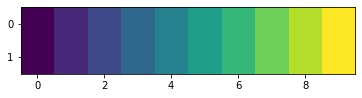

In [51]:
# COLOR MAP FOR REFERENCE

concat = np.concatenate((np.arange(0,10),np.arange(0,10))).reshape(2,10)
plt.imshow(concat)

with the above color mapping, we understand that the darker color represents a lower weight, while a brighter (yellower) color represents a higher weight
# visualizing the features for each layer:

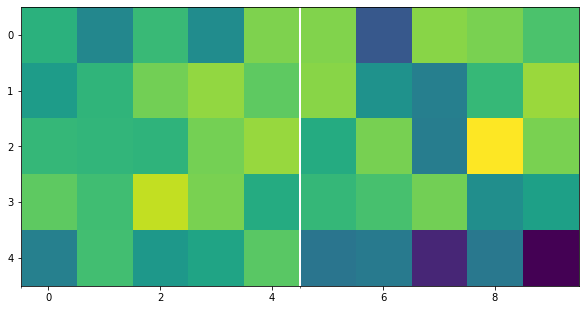

In [52]:
conv1 = model.c1.weight.detach().numpy()
c1 = np.reshape(conv1, (-1, 5, 5))

c1_cat = np.concatenate((c1[:]), axis=1)

plt.figure(figsize=(10,10))
plt.imshow(c1_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 5, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

# first conv layer:

these features look pretty random, but we can sort of see a semicircle on the right of the first ceature, and some diagonal patterns on the right feature

(2, 2, 5, 5)


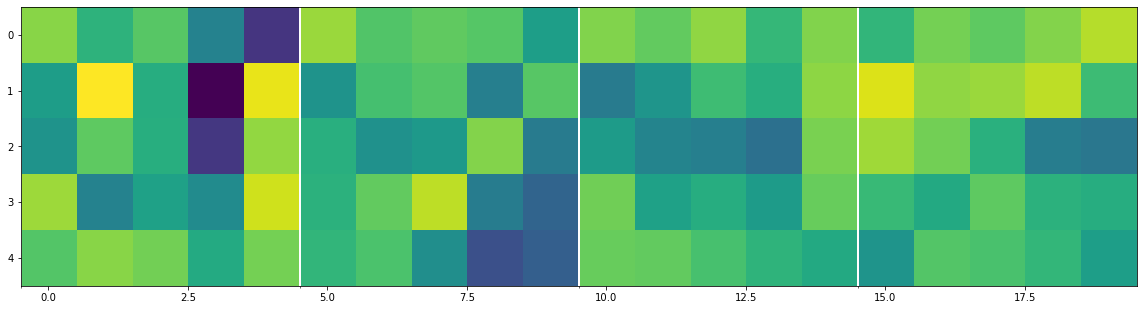

In [53]:
conv2 = model.c2.weight.detach().numpy()
print(conv2.shape)
c2 = np.reshape(conv2, (-1, 5, 5))

c2_cat = np.concatenate((c2[:]), axis=1)

plt.figure(figsize=(20, 20))
plt.imshow(c2_cat)
ax = plt.gca()
ax.set_xticks(np.arange(-.5, 15, 5), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


# second conv layer:

we can see that some patterns emerge from some of these features, the second and last one obviously detects some sort of diagonal, although the other ones still look somewhat random
# And finally, the weights for the linear layer
each row represents the array of weights for each output class

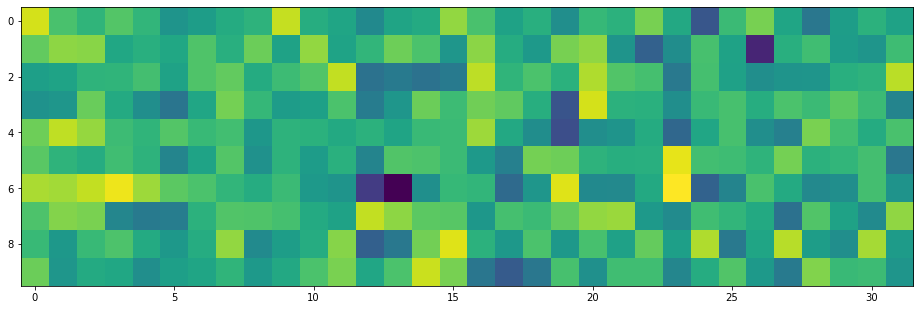

In [54]:
l1 = model.l1.weight.detach().numpy()
plt.figure(figsize=(16,16))
plt.imshow(l1)

ok all of these look really random
# let's push a handwritten '0' through the convnet and see what it looks like at each stage

In [55]:
# load the test set:
X_test = np.load('data/X_train.npy', allow_pickle=True)
y_test = np.load('data/y_train.npy', allow_pickle=True)
X_test = torch.tensor(X_test).view(-1, 1, 28, 28).float()

In [56]:
# digit to be selected
NUM = 2
# number of digits to display
NUM_NUMS = 3

# find some numss
num_loc = np.where(y_test == NUM)[0]
num_loc

array([    5,    16,    25, ..., 59983, 59985, 59991], dtype=int64)

torch.Size([3, 1, 28, 28])
(84, 28)


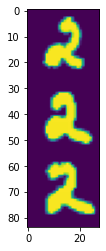

In [57]:
# since im too lazy to calculate good starting spots ill just use 200
start = np.random.randint(200)
nums = X_test[num_loc[start:start+3]].view(-1,1,28,28)
print(nums.shape)
dig_img = nums.reshape(-1, 28, 28)
dig_img = [i for i in dig_img] # huh idk why i need this but apparently you can only concat list
dig_img = np.concatenate((dig_img[:]))
print(dig_img.shape)
plt.imshow(dig_img)
# print(model(zero))

# visualizing the digit after the c1 layer:

(3, 2, 24, 24)


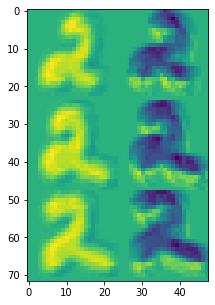

In [58]:
x_c1 = model.c1(nums)
c1 = x_c1.detach().numpy()
print(c1.shape)
c1 = c1.reshape((-1,2,24,24))
c1_cat = []
for i in range(c1.shape[0]):
    c1_cat.append(np.concatenate((c1[i][:]), axis=1))
c1_img = np.concatenate((c1_cat[:]))
plt.figure(figsize=(5,5))
plt.imshow(c1_img)

# after the first max pool:

(3, 2, 12, 12)


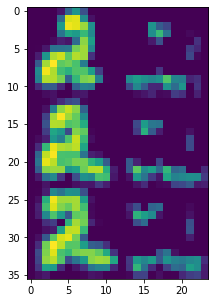

In [59]:
# visualizing maxpool2d on first layer:
x_mp1 = F.max_pool2d(F.relu(x_c1), (2,2))
mp1 = x_mp1.detach().numpy()
print(mp1.shape)
mp1 = mp1.reshape((-1,2,12,12))
mp1_cat = []
for i in range(mp1.shape[0]):
    mp1_cat.append(np.concatenate((mp1[i][:]), axis=1))
mp1_img = np.concatenate((mp1_cat[:]))
plt.figure(figsize=(5,5))
plt.imshow(mp1_img)

# after the second conv layer:

(3, 2, 8, 8)


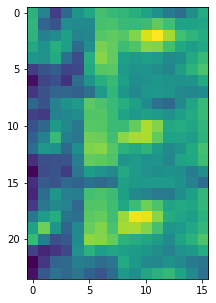

In [60]:
x_c2 = model.c2(x_mp1)
c2 = x_c2.detach().numpy()
print(c2.shape)
c2 = c2.reshape((-1,2,8,8))
c2_cat = []
for i in range(c2.shape[0]):
    c2_cat.append(np.concatenate((c2[i][:]), axis=1))
c2_img = np.concatenate((c2_cat[:]))
plt.figure(figsize=(5,5))
plt.imshow(c2_img)

# after the second max pool

(3, 2, 4, 4)


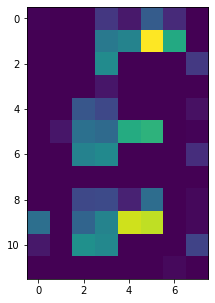

In [61]:
# visualizing maxpool2d on first layer:
x_mp2 = F.max_pool2d(F.relu(x_c2), (2,2))
mp2 = x_mp2.detach().numpy()
print(mp2.shape)
mp2 = mp2.reshape((-1,2,4,4))
mp2_cat = []
for i in range(mp2.shape[0]):
    mp2_cat.append(np.concatenate((mp2[i][:]), axis=1))
mp2_img = np.concatenate((mp2_cat[:]))
plt.figure(figsize=(5,5))
plt.imshow(mp2_img)